# May 14th

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler

In [2]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [3]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [4]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#gather 2000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-05-14', tweet_mode='extended').items(2000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [6]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,God help those who aren't paying attention to ...
1,All I wanna say is you should stack $QNT and $...
2,Our eyes on $YFI... • Price (#USD): $ 33911.24...
3,💟 #Cryptotwitter Sentiment on #Bitcoin \n\nHav...
4,Transhuman Coin is a powerful project that see...
5,#Bitcoin vs gold over the last 12 years.\n\nT...
6,Which one will happen first?\n#doge $5\n#SHIB ...
7,Top 5 Underrated Crypto Metaverse Coins With a...
8,#Bitcoin we Don't want crypto bull run. we sa...
9,Gm ct! Bought another 200 #USDT of #ETH at 330...


In [7]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [8]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,God help those who aren't paying attention to ...,God help those who aren't paying attention to ...
1,All I wanna say is you should stack $QNT and $...,All I wanna say is you should stack $QNT and $...
2,Our eyes on $YFI... • Price (#USD): $ 33911.24...,Our eyes on $YFI... • Price (): $ 33911.240000...
3,💟 #Cryptotwitter Sentiment on #Bitcoin \n\nHav...,💟 Sentiment on Bitcoin Have a look at mood o...
4,Transhuman Coin is a powerful project that see...,Transhuman Coin is a powerful project that see...


In [9]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,God help those who aren't paying attention to ...,God help those who aren't paying attention to ...,0.366667,0.266667
1,All I wanna say is you should stack $QNT and $...,All I wanna say is you should stack $QNT and $...,0.375000,0.333333
2,Our eyes on $YFI... • Price (#USD): $ 33911.24...,Our eyes on $YFI... • Price (): $ 33911.240000...,0.000000,0.000000
3,💟 #Cryptotwitter Sentiment on #Bitcoin \n\nHav...,💟 Sentiment on Bitcoin Have a look at mood o...,0.000000,0.000000
4,Transhuman Coin is a powerful project that see...,Transhuman Coin is a powerful project that see...,0.852083,-0.039583
5,#Bitcoin vs gold over the last 12 years.\n\nT...,Bitcoin vs gold over the last 12 years.That's...,0.066667,0.000000
6,Which one will happen first?\n#doge $5\n#SHIB ...,Which one will happen first? $5 $1 $3Bitcoin $...,0.333333,0.250000
7,Top 5 Underrated Crypto Metaverse Coins With a...,Top 5 Underrated Crypto Metaverse Coins With a...,0.500000,0.500000
8,#Bitcoin we Don't want crypto bull run. we sa...,Bitcoin we Don't want crypto bull run. we saw...,0.375000,0.000000
9,Gm ct! Bought another 200 #USDT of #ETH at 330...,"Gm ct! Bought another 200 of at 3302, will s...",0.000000,0.000000


In [10]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [11]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,God help those who aren't paying attention to ...,God help those who aren't paying attention to ...,0.366667,0.266667,Positive
1,All I wanna say is you should stack $QNT and $...,All I wanna say is you should stack $QNT and $...,0.375000,0.333333,Positive
2,Our eyes on $YFI... • Price (#USD): $ 33911.24...,Our eyes on $YFI... • Price (): $ 33911.240000...,0.000000,0.000000,Neutral
3,💟 #Cryptotwitter Sentiment on #Bitcoin \n\nHav...,💟 Sentiment on Bitcoin Have a look at mood o...,0.000000,0.000000,Neutral
4,Transhuman Coin is a powerful project that see...,Transhuman Coin is a powerful project that see...,0.852083,-0.039583,Negative
5,#Bitcoin vs gold over the last 12 years.\n\nT...,Bitcoin vs gold over the last 12 years.That's...,0.066667,0.000000,Neutral
6,Which one will happen first?\n#doge $5\n#SHIB ...,Which one will happen first? $5 $1 $3Bitcoin $...,0.333333,0.250000,Positive
7,Top 5 Underrated Crypto Metaverse Coins With a...,Top 5 Underrated Crypto Metaverse Coins With a...,0.500000,0.500000,Positive
8,#Bitcoin we Don't want crypto bull run. we sa...,Bitcoin we Don't want crypto bull run. we saw...,0.375000,0.000000,Neutral
9,Gm ct! Bought another 200 #USDT of #ETH at 330...,"Gm ct! Bought another 200 of at 3302, will s...",0.000000,0.000000,Neutral


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


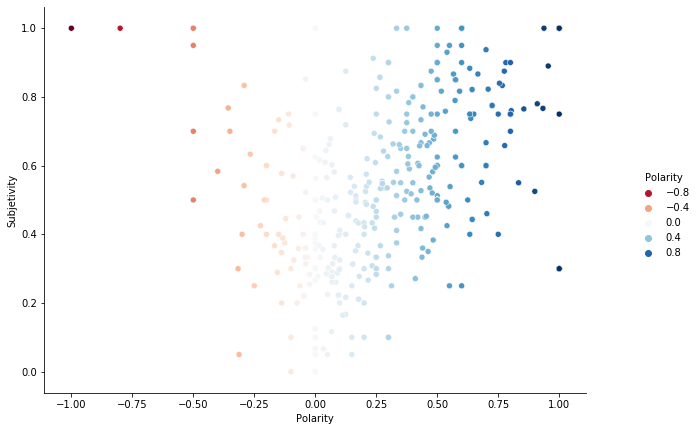

In [12]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

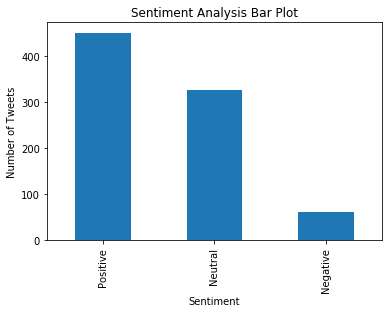

In [13]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [14]:
df['Sentiment'].value_counts()

Positive    450
Neutral     325
Negative     61
Name: Sentiment, dtype: int64

In [ ]:
lst_df = list(df['Sentiment'].value_counts())
lst_df

In [ ]:
dfs = pd.read_csv("f_sentiments.csv")
  
# updating the column value/data
dfs.loc[4, 'Sentiment'] = 'day 5'
dfs.loc[4, 'Positive'] = lst_df[0]
dfs.loc[4, 'Neutral'] = lst_df[1]
dfs.loc[4, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("f_sentiments.csv", index=False)
  
print(dfs)

In [ ]:
#450 325 61